In [2]:
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [3]:
from tensorflow.keras import datasets
(X_tn0, y_tn0), (X_te0, y_te0)=datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
print(X_tn0.shape)
print(y_tn0.shape)
print(X_te0.shape)
print(y_te0.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


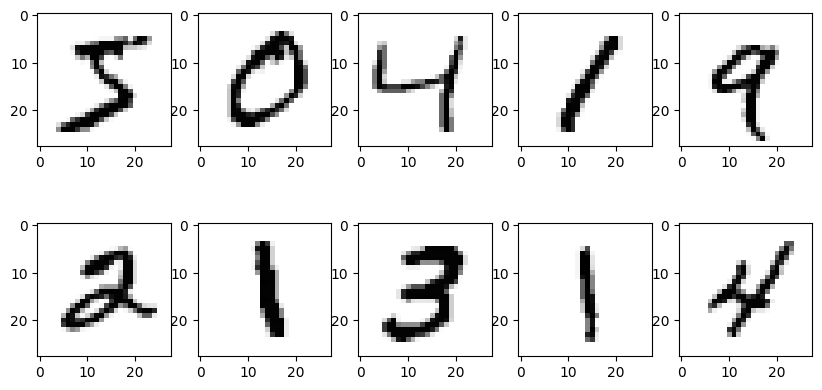

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_tn0[i].reshape((28, 28)), cmap='Greys')

In [8]:
print(set(y_tn0))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [9]:
X_tn_re = X_tn0.reshape(60000, 28, 28, 1)
X_tn = X_tn_re/255
print(X_tn.shape)

(60000, 28, 28, 1)


In [10]:
X_te_re = X_te0.reshape(10000, 28, 28, 1)
X_te = X_te_re/255
print(X_te.shape)

(10000, 28, 28, 1)


In [11]:
from tensorflow.keras.utils import to_categorical
y_tn = to_categorical(y_tn0)
y_te = to_categorical(y_te0)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

n_class = len(set(y_tn0))

model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), input_shape=(28,28,1), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_class, activation='softmax'))
model.summary()

c:\anaconda3\envs\test\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       820,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 840,554 (3.21 MB)

 Trainable params: 840,554 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
hist = model.fit(X_tn, y_tn, epochs=3, batch_size=100)

Epoch 1/3
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.8419 - loss: 0.5018
Epoch 2/3
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9745 - loss: 0.0834
Epoch 3/3
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9815 - loss: 0.0593


In [17]:
print(model.evaluate(X_tn, y_tn)[1])

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9918 - loss: 0.0276
0.9919666647911072


In [18]:
print(model.evaluate(X_te, y_te)[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9888 - loss: 0.0317
0.9902999997138977


In [19]:
y_pred_hot = model.predict(X_te)
print(y_pred_hot[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[1.4735242e-08 5.3661601e-08 4.1565511e-07 1.9178513e-05 1.0688842e-09
 1.1695375e-08 9.2691878e-12 9.9997902e-01 3.1669135e-08 1.2322212e-06]


In [21]:
import numpy as np
y_pred = np.argmax(y_pred_hot, axis=1)
print(y_pred)

[7 2 1 ... 4 5 6]


In [22]:
diff = y_te0 - y_pred
diff_idx = []
y_len = len(y_te0)
for i in range(0, y_len):
    if(diff[i]!=0):
        diff_idx.append(i)

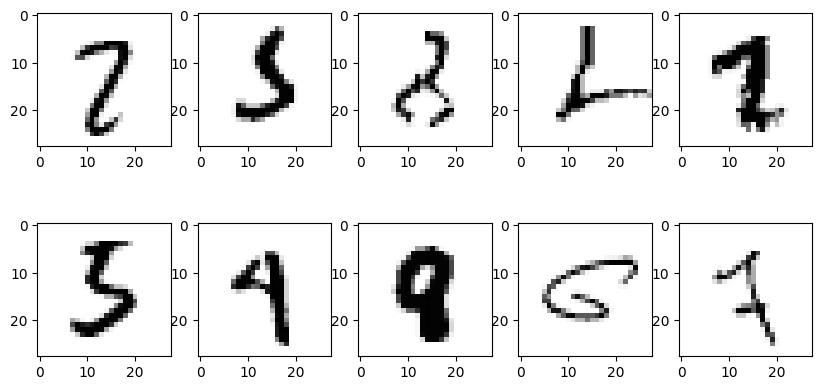

: 

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    raw_idx = diff_idx[i]
    plt.imshow(X_te0[raw_idx].reshape((28, 28)), cmap='Greys')

plt.show()